In [1]:
# run for the first time only
install.packages("ncdf4")
install.packages("corrplot")
install.packages("lavaan")

Installing package into 'C:/Users/35953/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'ncdf4' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'ncdf4'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\35953\AppData\Local\R\win-library\4.2\00LOCK\ncdf4\libs\x64\ncdf4.dll to C:\Users\35953\AppData\Local\R\win-library\4.2\ncdf4\libs\x64\ncdf4.dll: Permission denied"
Warning message:
"restored 'ncdf4'"



The downloaded binary packages are in
	C:\Users\35953\AppData\Local\Temp\RtmpYVCvI7\downloaded_packages


Installing package into 'C:/Users/35953/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\35953\AppData\Local\Temp\RtmpYVCvI7\downloaded_packages


Installing package into 'C:/Users/35953/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'lavaan' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\35953\AppData\Local\Temp\RtmpYVCvI7\downloaded_packages


In [2]:
# load libraries
library(ncdf4)
library(corrplot)
library(lavaan)

Warning message:
"package 'ncdf4' was built under R version 4.2.3"
Warning message:
"package 'corrplot' was built under R version 4.2.3"
corrplot 0.92 loaded

Warning message:
"package 'lavaan' was built under R version 4.2.3"
This is lavaan 0.6-17
lavaan is FREE software! Please report any bugs.



In [3]:
# Specify the path to the NetCDF file and the file name (this is where the downloaded file is located)
file_path1 = "E:/AA_temperature.nc"
file_path2 = "E:/AA_precipitation.nc"
file_path3 = "E:/AA_solarradiation.nc"
file_path4 = "E:/AA_cloudcover.nc"

# define a function to get the grid data
gdpt = function(filepath,xx,yy)
{
    # Open the NetCDF file
    nc = nc_open(filepath)

    # Retrieve data, units are kept as original from era5 data, e.g., temperature in Kelvin
    data = ncvar_get(nc, names(nc$var)[1])
    datapoint = data[xx, yy,]
    return(datapoint)
}

TA = gdpt(file_path1,30,120)
PR = gdpt(file_path2,30,120)
RN = gdpt(file_path3,30,120)
CC = gdpt(file_path4,30,120)

# make a dataframe
data = data.frame(TA,PR,RN,CC)
# print to see the monthly value:
print(data)

          TA            PR       RN         CC
1   288.5155  2.524465e-05 14014983 0.14679531
2   292.9096  8.583182e-05 16992369 0.11235520
3   298.5203  8.835629e-05 19159386 0.25279868
4   302.9333  3.875054e-04 21244954 0.14621929
5   306.9348  5.377111e-04 20419777 0.17950735
6   302.0649  1.027836e-02 13670268 0.73194364
7   299.3566  1.250494e-02  8124794 0.93383967
8   300.2194  7.337359e-03 11746361 0.82918540
9   301.2176  1.144845e-03 16762010 0.36471387
10  298.0945  2.861482e-03 14734442 0.28695078
11  293.4419  1.388456e-05 14645178 0.05397983
12  290.0970 -6.938894e-18 13529996 0.11147601
13  288.7162  1.539924e-04 13487626 0.16712285
14  293.2334  5.036308e-04 15771056 0.18993639
15  298.9773  5.301377e-05 19311587 0.23015189
16  304.9141  1.085520e-04 21493824 0.15314672
17  308.4953  2.600199e-04 21257706 0.11846408
18  304.9152  3.107617e-03 17415241 0.52478761
19  303.5111  2.891775e-03 15379447 0.79231993
20  299.4276  1.468860e-02  8648037 0.93594670
21  299.5340 

In [4]:
# calculate the annual values
TA_annual = apply(matrix(TA, nrow = 12, byrow = TRUE), 2, mean)
PR_annual = apply(matrix(PR, nrow = 12, byrow = TRUE), 2, sum)
RN_annual = apply(matrix(RN, nrow = 12, byrow = TRUE), 2, sum)
CC_annual = apply(matrix(CC, nrow = 12, byrow = TRUE), 2, sum)

data_annual = data.frame(TA_annual,PR_annual,RN_annual,CC_annual)
# print to see the annual value:
print(data_annual)

   TA_annual  PR_annual RN_annual CC_annual
1   298.5431 0.03052205 187355098  4.229514
2   298.9462 0.03440468 192864372  3.903106
3   298.1845 0.04330089 183646323  4.633579
4   298.8027 0.02602850 189063454  4.046490
5   298.2300 0.03742015 188960204  4.381159
6   298.2739 0.03416485 185235798  4.522482
7   298.3114 0.04818321 175132102  4.946056
8   298.5952 0.02383979 189825695  4.182356
9   298.8378 0.01697072 194518430  4.104547
10  298.3117 0.05561776 179847462  4.596001


           TA_annual  PR_annual  RN_annual  CC_annual
TA_annual  1.0000000 -0.6706850  0.7112301 -0.8543402
PR_annual -0.6706850  1.0000000 -0.8345066  0.7452981
RN_annual  0.7112301 -0.8345066  1.0000000 -0.9209281
CC_annual -0.8543402  0.7452981 -0.9209281  1.0000000


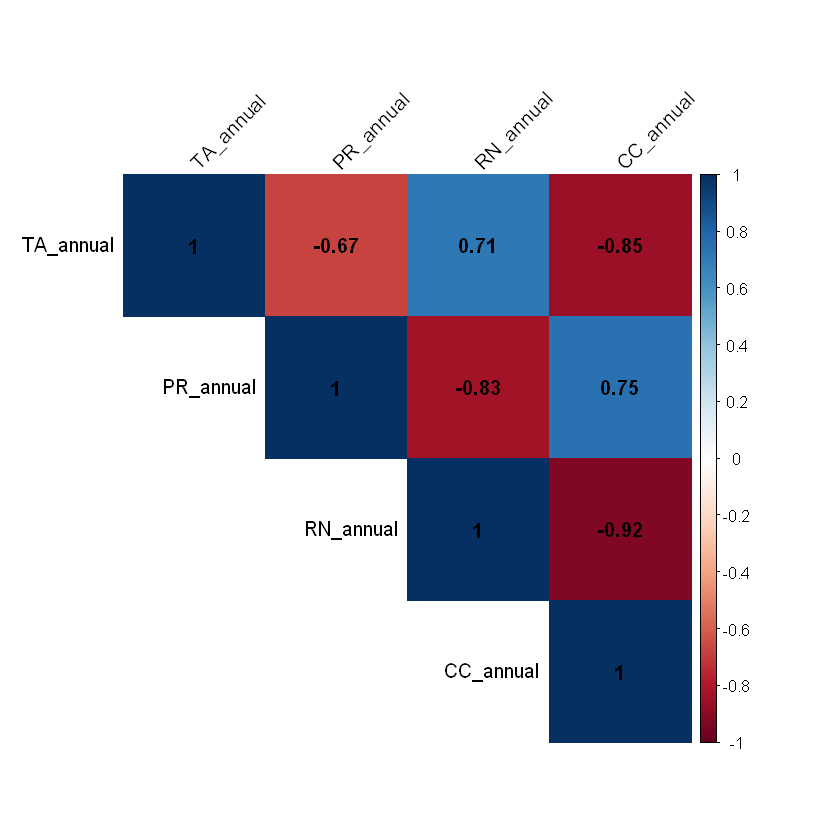

In [5]:
# 01 - Correlation Coefficient

# Compute the correlation matrix between pairs of variables
correlation_matrix = cor(data_annual)

# Print the correlation matrix
print(correlation_matrix)

# Plot a heatmap of the correlation matrix
corrplot(correlation_matrix, method = "color", type = "upper", 
         addCoef.col = "black", tl.col = "black", tl.srt = 45)

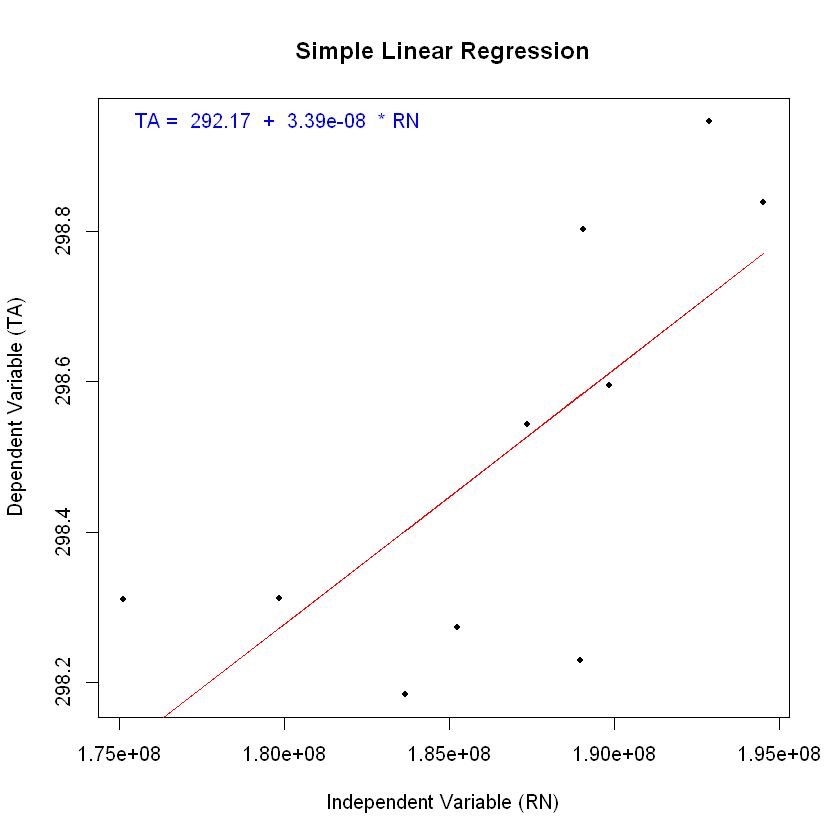

In [6]:
# 02 - linear Regression

# Perform simple linear regression on the TA and PR
lm_model = lm(data_annual[,'TA_annual'] ~ data_annual[,'RN_annual'])

coef = coef(lm_model)

# Plot the data points
plot(data_annual[,'RN_annual'], data_annual[,'TA_annual'], main = "Simple Linear Regression", 
     xlab = "Independent Variable (RN)", ylab = "Dependent Variable (TA)", pch=20)

# Get the coefficients of the regression model
lines(data_annual[,'RN_annual'], predict(lm_model), col = "red")

# Annotate the plot with the regression equation
equation = paste("TA = ", round(coef[1], 2), " + ", round(coef[2], 10), " * RN", sep = " ")
text(min(data_annual[,'RN_annual']), max(data_annual[,'TA_annual']), as.character(equation), pos = 4, col = "blue")


In [10]:
#install packages for path analysis (this process can be very slow)
install.packages("openxlsx")
install.packages("semPlot", dependencies = TRUE, INSTALL_opts = '--no-lock')
library(semPlot)

Installing package into 'C:/Users/35953/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'openxlsx' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\35953\AppData\Local\Temp\RtmpYVCvI7\downloaded_packages


Installing package into 'C:/Users/35953/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'semPlot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\35953\AppData\Local\Temp\RtmpYVCvI7\downloaded_packages


Warning message:
"package 'semPlot' was built under R version 4.2.3"


lavaan 0.6.17 ended normally after 17 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         6

  Number of observations                            10

Model Test User Model:
                                                      
  Test statistic                                 0.000
  Degrees of freedom                                 0

Model Test Baseline Model:

  Test statistic                                33.434
  Degrees of freedom                                 3
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000
  Tucker-Lewis Index (TLI)                       1.000

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)                -24.271
  Loglikelihood unrestricted model (H1)        -24.271
                                                

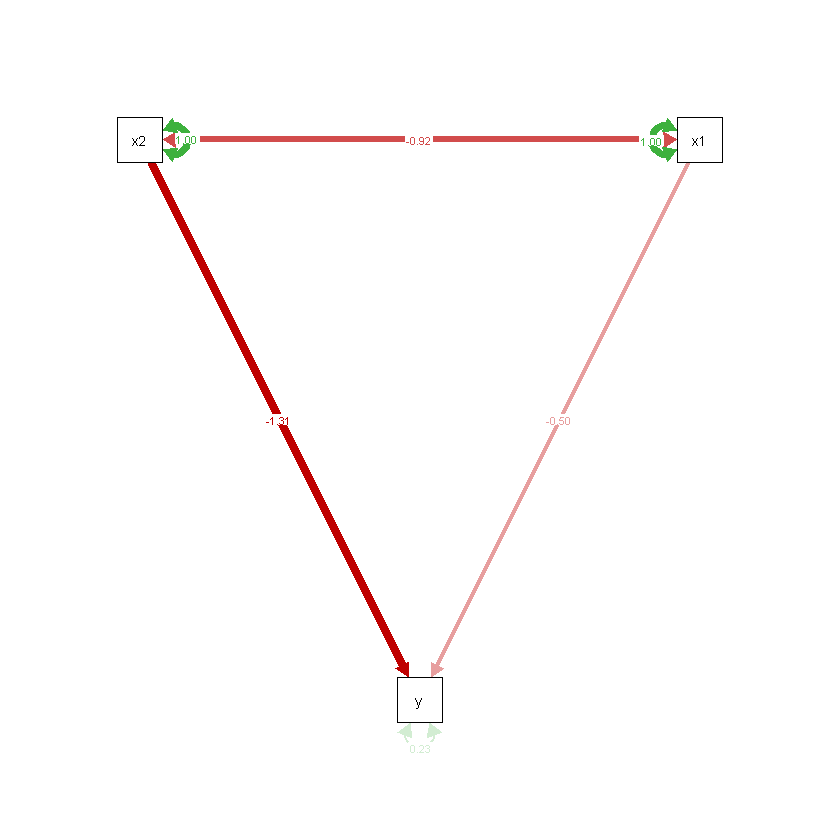

In [11]:
# 03 - Path Analysis

patha = function(dfs)
{
  model = 'y ~ x1 + x2
           x1~~x2'
  fit <- cfa(model, data = dfs)
  summary(fit, fit.measures = TRUE, standardized=T, rsquare=T)
  semPaths(fit, 'std', layout = 'circle')
  print(summary(fit, fit.measures = TRUE, standardized=T, rsquare=T))
}

dfs = data.frame(y = scale(data_annual[,'TA_annual']), x1 = scale(data_annual[,'RN_annual']), x2 = scale(data_annual[,'CC_annual']))
patha(dfs)
